In [144]:
# Import library
import pandas as pd

#### Header information for model output
* date, hour, min, sec, HS, L, TM, MDIR, SPR, FP, PDIR, PSPR, WS, WDIR, HSA, HSB, TMA, TMB, MDIRA , MDIRB, HS_C, TM_C
#### Header information for buoy observation
* date_time,hm0,hm0a,hmo0b,tp,tm02,tm02a,tm02b,WS,mdir,mdira,
mdirb,tm10.


In [145]:
# Read the model file (separator ' '),no header, column name given as. 
#Then parse the as required  
df1=pd.read_csv('AD06_2014_2017_ww3.txt',sep=' ',header=None,
                names=['Date', 'hr', 'min', 'sec', 'HS', 'L', 'TM', 'MDIR', 
             'SPR', 'FP', 'PDIR', 'PSPR','WS', 'WDIR','HSA', 'HSB', 
             'TMA', 'TMB', 'MDIRA' , 'MDIRB', 'HS_C', 'TM_C'],
                parse_dates=[['Date','hr','min','sec']])
# Read the buoy file(for remove first row use skiprows=1) and for 
#column name (use name=['column'])
dfb=pd.read_csv('MB_OBS_DATA/AD06_2014_2017_obs.txt',sep='\t',header=None,
        skiprows=1,names=['date_time','hm0','hm0a','hm0b','tp','tm02',
                'tm02a','tm02b','WS','mdir','mdira','mdirb','tm10'],parse_dates=['date_time'])

In [146]:
# Here df1 dataframe has datetime is not the required format so we will convert into required format
# by using to_datetime function
df1['datetime']=pd.to_datetime(df1.Date_hr_min_sec,yearfirst=True,format='%Y%m%d %H %M %S')
# set the index as datetime column
df1.set_index('datetime',inplace=True)
# drop the date_hr_min_sec column 
dfm = df1.drop('Date_hr_min_sec',axis=1)
# Same like make date_time as index in df2
dfb.set_index('date_time',inplace=True)
# Generate the date and time vector from 2014-2017 by using date_range
dt_range = pd.date_range(start='2013-12-15 06:00:00',end='2018-01-01 00:00:00',freq='3H')

In [147]:
dfmerge=pd.concat([dfb['hm0'],dfm['HS']],axis=1)
dfmerge.tail(5)

,hm0,HS
2017-12-31 12:00:00,1.1572,1.132
2017-12-31 15:00:00,1.1279,1.082
2017-12-31 18:00:00,0.9961,1.016
2017-12-31 21:00:00,0.9229,0.950
2018-01-01 00:00:00,NaN,0.897


Text(0,0.5,'Buoy')

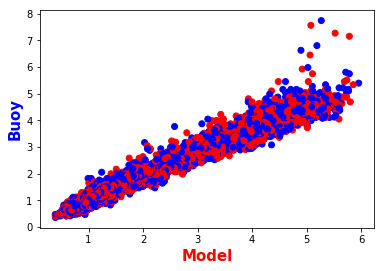

In [148]:
import numpy as np
dfmerge.loc[(dfmerge.hm0>8) | (dfmerge.hm0==0),'hm0'] = np.nan
import matplotlib.pyplot as plt
%matplotlib inline
l1=plt.scatter(dfmerge['HS'],dfmerge['hm0'],color=['red','blue'])
plt.xlabel('Model',color='red',fontweight='bold',fontsize=15)
plt.ylabel('Buoy',color='blue',fontweight='bold',fontsize=15)

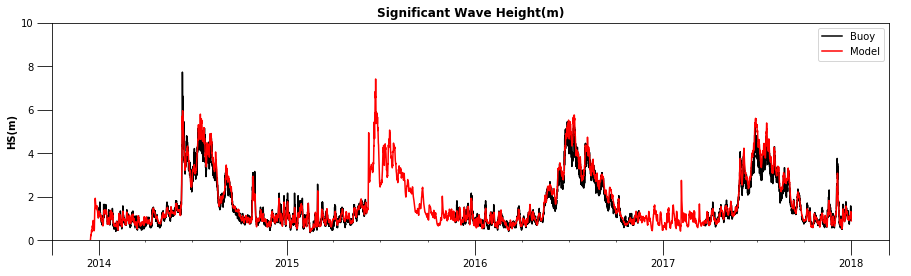

In [149]:
# Plot of buoy and model using pandas plot
ax=dfmerge.plot(figsize=(15,4),color=['k','r'])
ax.set_ylim(0,10)
ax.legend(['Buoy','Model'])
ax.set_title('Significant Wave Height(m)',fontweight='bold')
ax.set_ylabel('HS(m)',fontweight='bold')
ax.tick_params(labelcolor='k',size=15)

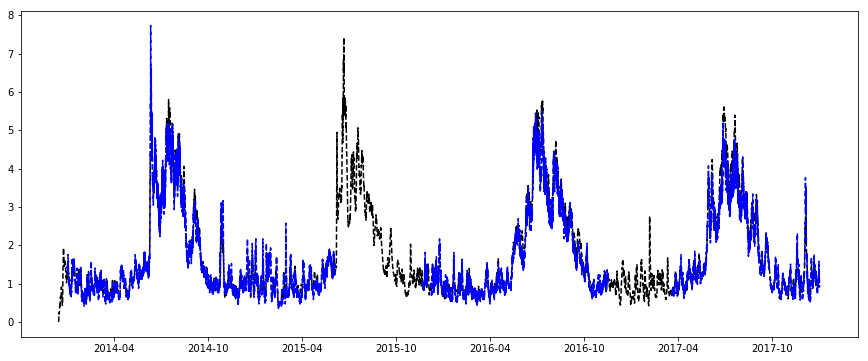

In [150]:
# plot of model and buoy using matplotlib 
plt.figure(figsize=(15,6))
plt.plot(dfmerge['HS'],'k--',dfmerge['hm0'],'b--')

#### Findings
* Here the outliers are removed and found that wave height from 2014 to 2017 varied (0-8m) 

### Rangewise buoy and model data distribution
#### First of all we have to check the waveheight(histogram) distribution

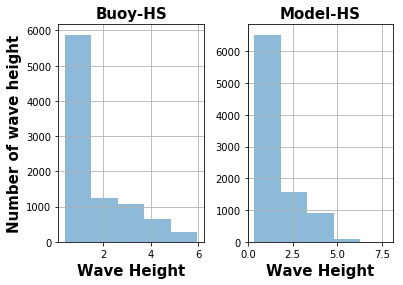

In [307]:
aa=dfmerge.hist(bins=5,alpha=0.5)
for i,tit in zip([0,1],['Buoy-HS','Model-HS']):
    aa[0,i].set_xlabel('Wave Height',fontweight='bold',fontsize=15)
    aa[0,i].set_title(tit,fontweight='bold',fontsize=15)
    if i==0:
        aa[0,i].set_ylabel('Number of wave height',fontweight='bold',fontsize=15)


#### Findins
* From the above histogram distribution having 5 bins(0 to 8m) having gap of 1.6m  
* 0-1.6m is getting histest number of wave heights around 7k for both model and buoy (less because of gap)
* 1.6-3.2m is getting the number of waves heights are aound ~2000 and ~1500 respectively model nd buoy  

### Bias calculation of total data

Mean bias is 0.091
Total number of bias is (9115,)


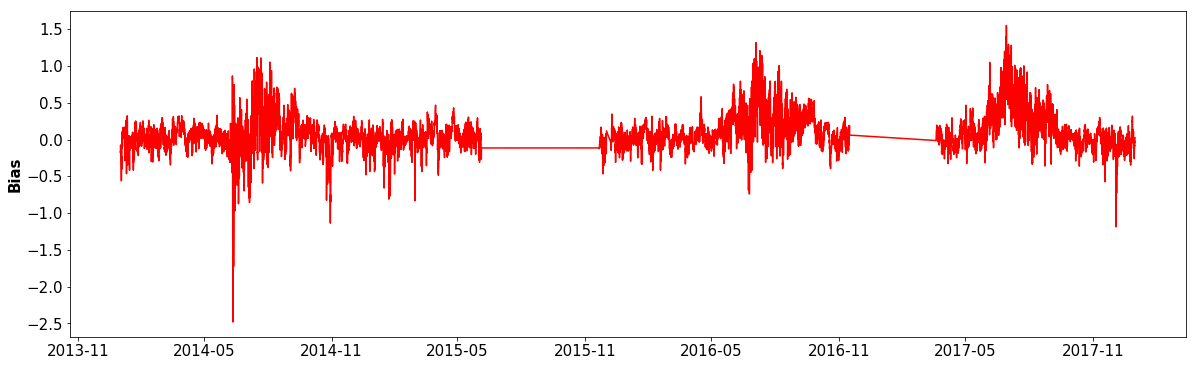

In [324]:
# First les us try without dropping NaN values
f,ax=plt.subplots(1,1,figsize=(20,6),sharex=False,sharey=False)
#plt.subplots_adjust(hspace=0.2)
bias=dfmerge['HS']-dfmerge['hm0']
ax.plot(bias,color='r')
ax.set_ylabel('Bias',fontsize=15,fontweight='bold')
ax.tick_params(axis='both',which='major',labelsize=15)
mean_bias=np.mean(bias)
total_bias=np.shape(bias)
print('Mean bias is {}'.format(round(mean_bias,3)))
print('Total number of bias is {}'.format(total_bias))

#### Findings
* Here it is automatically removing NaN values while ploting histogram plot
* Plot for mean bias is showing within the range of -2.5 to 1.5 m
* Maximum number of bias are within -0.1 to 0.7 

Text(0,0.5,'Number of bias points')

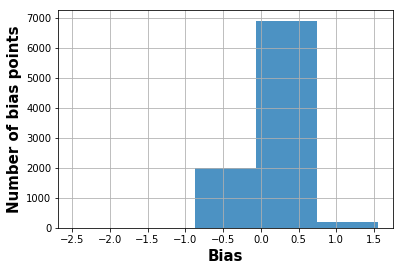

In [325]:
ax=bias.hist(bins=5,alpha=0.8)
ax.set_xlabel('Bias',fontweight='bold',fontsize=15)
ax.set_ylabel('Number of bias points',fontweight='bold',fontsize=15)

#### Rangewise bias calculation for HS
* If we will take different range of significant wave height data then calculate the bias
* Take (0-2,2-4,4-6,6-8) as range

In [371]:
bias0_2=np.mean(dfmerge[(dfmerge.HS>0) & (dfmerge.HS<2)]['HS']-dfmerge[(dfmerge.hm0>0) & (dfmerge.hm0<2)]['hm0'])
bias2_4=np.mean(dfmerge[(dfmerge.HS>=2) & (dfmerge.HS<4)]['HS']-dfmerge[(dfmerge.hm0>=2) & (dfmerge.hm0<4)]['hm0'])
bias4_6=np.mean(dfmerge[(dfmerge.HS>=4) & (dfmerge.HS<6)]['HS']-dfmerge[(dfmerge.hm0>=4) & (dfmerge.hm0<6)]['hm0'])
bias6_8=np.mean(dfmerge[(dfmerge.HS>=6) & (dfmerge.HS<8)]['HS']-dfmerge[(dfmerge.hm0>=6) & (dfmerge.hm0<8)]['hm0'])

In [377]:
print('Bias range from 0 to 2m is {} for Sig wave height'.format(round(bias0_2,4)))
print('Bias range from 2 to 4m is {} for Sig wave height'.format(round(bias2_4,4)))
print('Bias range from 4 to 6m is {} for Sig wave height'.format(round(bias4_6,4)))
print('Bias range from 6 to 8m is {} for Sig wave height'.format(round(bias6_8,4)))

Bias range from 0 to 2m is 0.0206 for Sig wave height
Bias range from 2 to 4m is 0.2099 for Sig wave height
Bias range from 4 to 6m is 0.3613 for Sig wave height
Bias range from 6 to 8m is nan for Sig wave height


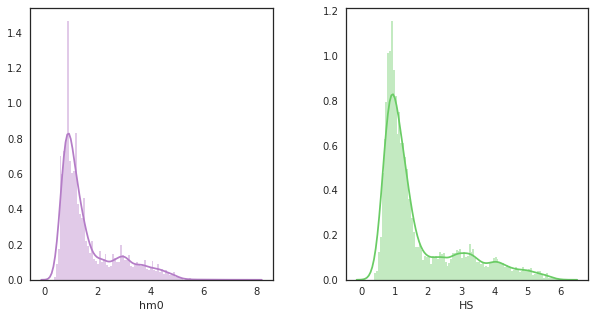

In [396]:
#distplot is like histogram type plots having univariate distribution
import seaborn as sns
sns.set(style='white',palette='muted',color_codes=True)
f,axes=plt.subplots(1,2,figsize=(10,5))
plt.subplots_adjust(wspace=0.3)
sns.distplot(dfmerge['hm0'],label='Buoy_HS',color='m',bins=100,ax=axes[0])
sns.distplot(dfmerge['HS'],label='Model_HS',color='g',bins=100,ax=axes[1])

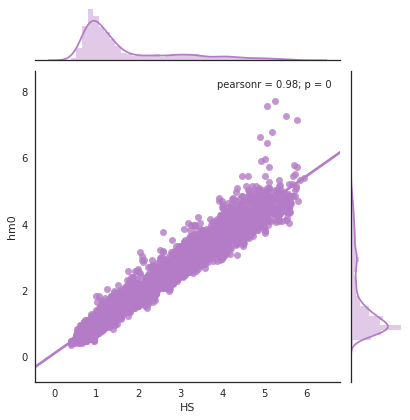

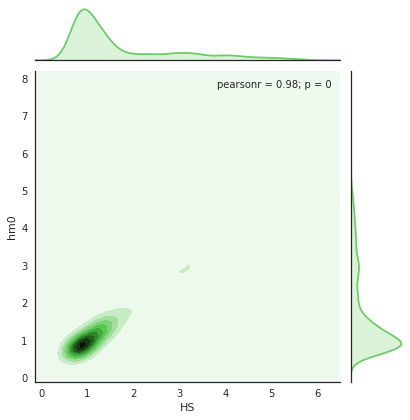

In [406]:
# Multivariate histogram plot
sns.set(style='white',palette='muted',color_codes=True)
sns.jointplot(x='HS',y='hm0',data=dfmerge,kind='reg',color='m')
sns.jointplot(x='HS',y='hm0',data=dfmerge,kind='kde',color='g')